In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import Series
import seaborn as sns

dfCaudal = pd.read_excel(r'caudal.xlsx')
dfCaudal = pd.DataFrame(dfCaudal, columns=['Tempo', 'Caudal'])

dfCaudal['Tempo'] = pd.to_datetime(dfCaudal['Tempo'])

#dfCaudal = dfCaudal[dfCaudal.Tempo.between('2019-06-1', '2022-09-01')]
"""
series = Series(dfCaudal['Caudal'])
series.describe()
"""
dfCaudal['Caudal'] = pd.to_numeric(dfCaudal['Caudal'], errors='coerce')
dfCaudal = dfCaudal[dfCaudal['Tempo'] < '9/14/2022'] 


In [73]:
#fig, axis = plt.subplots(figsize =(10, 5))
#bins =  range(22)

#mesEAnoHist('2020', 0.1)
#mesEAnoHist('2021', 0.5)
#mesEAnoHist('2022', 0.9)


In [74]:
def caudalMesEntre(time1, time2):
    return dfCaudal["Caudal"][dfCaudal["Tempo"] > time1][dfCaudal["Tempo"] < time2].copy()


In [75]:
def mesEAnoHist(ano, alpha):
    axis.hist(caudalMesEntre(f'{ano}-1-1', f'{ano}-2-1'), bins, color='red', alpha=alpha)
    axis.hist(caudalMesEntre(f'{ano}-2-1', f'{ano}-3-1'), bins, color='lime', alpha=alpha)
    axis.hist(caudalMesEntre(f'{ano}-3-1', f'{ano}-4-1'), bins, color='blue',alpha=alpha)
    axis.hist(caudalMesEntre(f'{ano}-4-1', f'{ano}-5-1'), bins, color='pink', alpha=alpha)



In [76]:
def plotCaudal(time1, time2, label):
    cau = dfCaudal[dfCaudal['Tempo'] > time1][dfCaudal['Tempo'] < time2]
    plt.plot(cau.Tempo, cau.Caudal, label=label)
    leg = plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('Volume (m3)')
    plt.xlabel('Tempo (h)')
    plt.grid(True)

                    Tempo  Caudal  dayofweek
3664  2020-06-02 16:00:00   20.38          1
3856  2020-06-10 16:00:00   20.17          2
4700  2020-07-15 20:29:15   20.16          2
4749  2020-07-17 21:29:18   20.50          4
4821  2020-07-20 21:29:18   21.30          0
...                   ...     ...        ...
22409 2022-08-11 07:00:00   33.22          3
22899 2022-08-31 12:00:00   27.40          2
22901 2022-08-31 13:00:00   23.82          2
22903 2022-08-31 14:00:00   22.08          2
22905 2022-08-31 15:00:00   24.20          2

[184 rows x 3 columns]
29.71
month            1         2         3         4         5         6   \
dayofweek                                                               
0          5.927147  5.938276  6.070357  6.749336  7.514345  8.598358   
1          5.794325  5.908931  6.136083  6.657684  7.663397  8.944236   
2          5.876000  6.020069  6.180240  6.829135  7.704583  8.621020   
3          5.875142  5.949483  6.178237  6.695988  7.881806  9.06

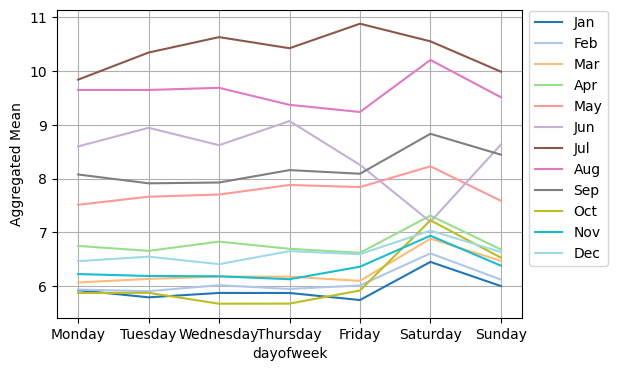

In [83]:
weekVariation = dfCaudal.copy()
weekVariation['dayofweek'] = weekVariation['Tempo'].dt.dayofweek
#filtro de valores pouco vulgares = limpeza de valores exessivos

print(weekVariation[weekVariation['Caudal'] > 20])

weekVariation = weekVariation[weekVariation['Caudal'] < 30]

weekVariation['month'] = weekVariation['Tempo'].dt.month
weekVariation.set_index(["month","dayofweek"], inplace = True)
from calendar import month_abbr
print(month_abbr)

dfp = pd.pivot_table(data=weekVariation, index='dayofweek', columns='month', values='Caudal', aggfunc='mean')
print(weekVariation.Caudal.max())
print(dfp)


ax = dfp.plot(ylabel='Aggregated Mean', figsize=(6, 4), cmap='tab20')
ax.set_xticks(range(7)) # set ticks for all months
ax.set_xticklabels( ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', labels = month_abbr[1:])

ax.grid(True)

In [58]:
dfp.head(12*3)

month,1,2,3,4,5,6,7,8,9,10,11,12
dayofweek,,,,,,,,,,,,
0,5.927147,5.938276,6.070357,6.749336,7.514345,8.598358,9.911610,9.647750,8.076543,5.875156,7.604529,6.466667
1,5.794325,5.908931,6.136083,6.657684,7.663397,8.944236,10.342535,9.647351,7.912538,5.878229,6.190833,6.550417
2,5.876000,6.020069,6.180240,6.829135,7.704583,8.782838,10.708077,9.750895,7.927576,5.675573,6.185476,6.410456
3,5.875142,5.949483,6.178237,6.695988,7.881806,9.069310,10.422679,9.452740,8.158144,5.677336,6.130833,6.652231
4,5.744286,6.015280,6.100069,6.621964,7.842596,8.255253,10.878000,9.238021,8.090750,8.830711,6.363444,6.595972
5,6.452700,6.611154,6.884236,7.313365,8.228571,10.284679,10.550618,10.205032,8.832750,11.908085,6.939223,7.034427
6,6.003988,6.124306,6.472136,6.683229,7.588167,8.632131,9.987276,9.511752,8.444625,6.531574,11.987056,6.636615


<AxesSubplot: ylabel='Frequency'>

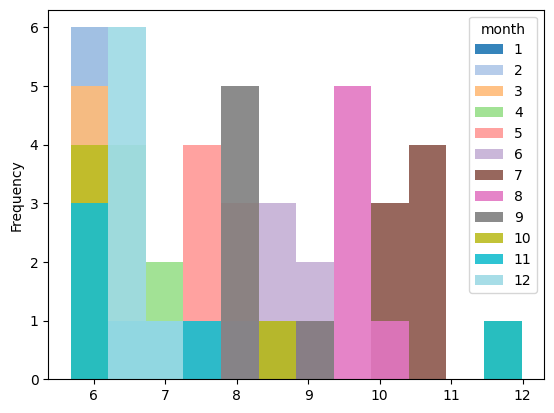

In [59]:
dfp.plot.hist(bins=12, alpha=0.9, cmap='tab20')

<AxesSubplot: >

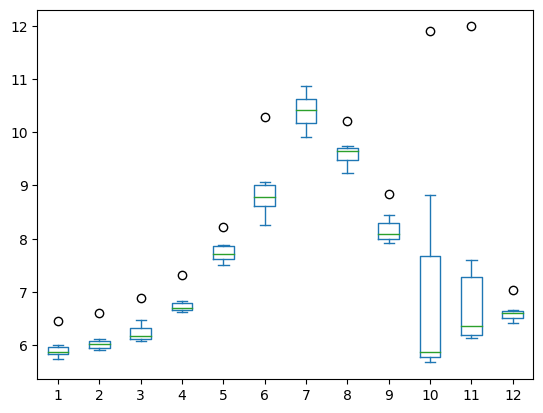

In [60]:
dfp.plot(kind='box')

<AxesSubplot: ylabel='Density'>

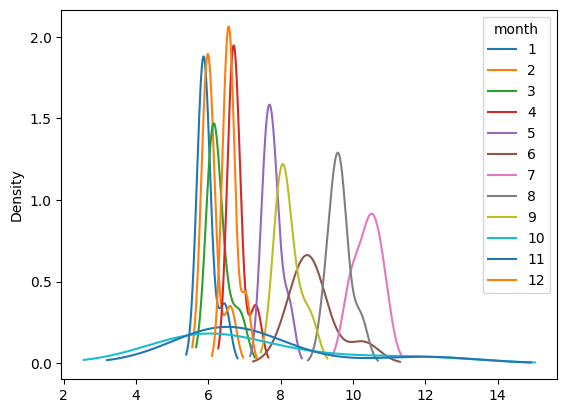

In [61]:
dfp.plot(kind='kde')

<AxesSubplot: xlabel='dayofweek'>

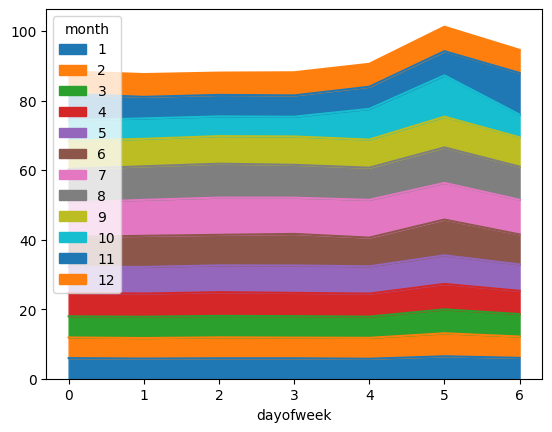

In [62]:
dfp.plot(kind='area')

In [63]:
checkStrangeValues = dfCaudal.copy()

checkStrangeValues = checkStrangeValues[checkStrangeValues['Tempo'] > '2022-05-10']
checkStrangeValues['diff'] = checkStrangeValues.Caudal.diff()
checkStrangeValues['diff']= checkStrangeValues['diff'].fillna(0)
checkStrangeValues.head()

,Tempo,Caudal,diff
20495,2022-05-10 00:36:38,6.47,0.00
20496,2022-05-10 01:36:38,5.89,-0.58
20497,2022-05-10 02:36:38,5.34,-0.55
20498,2022-05-10 03:36:38,5.28,-0.06
20499,2022-05-10 04:36:40,5.27,-0.01


C:\Users\Francisco\AppData\Local\Temp\ipykernel_14596\438222098.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valuesToCheck = valuesToCheck[valuesToCheck["Tempo"] > '2022-06-17'][valuesToCheck["Tempo"] < '2022-06-18']


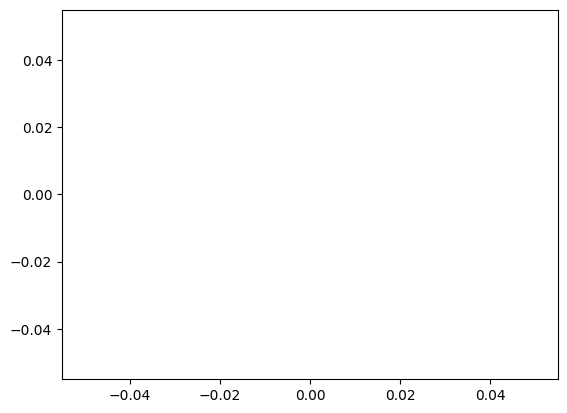

In [64]:
valuesToCheck = checkStrangeValues.copy()
valuesToCheck["hora"] = valuesToCheck.Tempo.dt.hour
valuesToCheck = valuesToCheck[valuesToCheck["Tempo"] > '2022-06-17'][valuesToCheck["Tempo"] < '2022-06-18']
plt.plot(valuesToCheck["hora"], valuesToCheck['diff'])




In [65]:

caudaldiario = dfCaudal.resample('D').mean()
caudaldiario= caudaldiario.loc['2022-01-01':]
caudaldiario.head()
caudaldiario.plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [37]:
caudaldiario.index.dt.year

NameError: name 'caudaldiario' is not defined